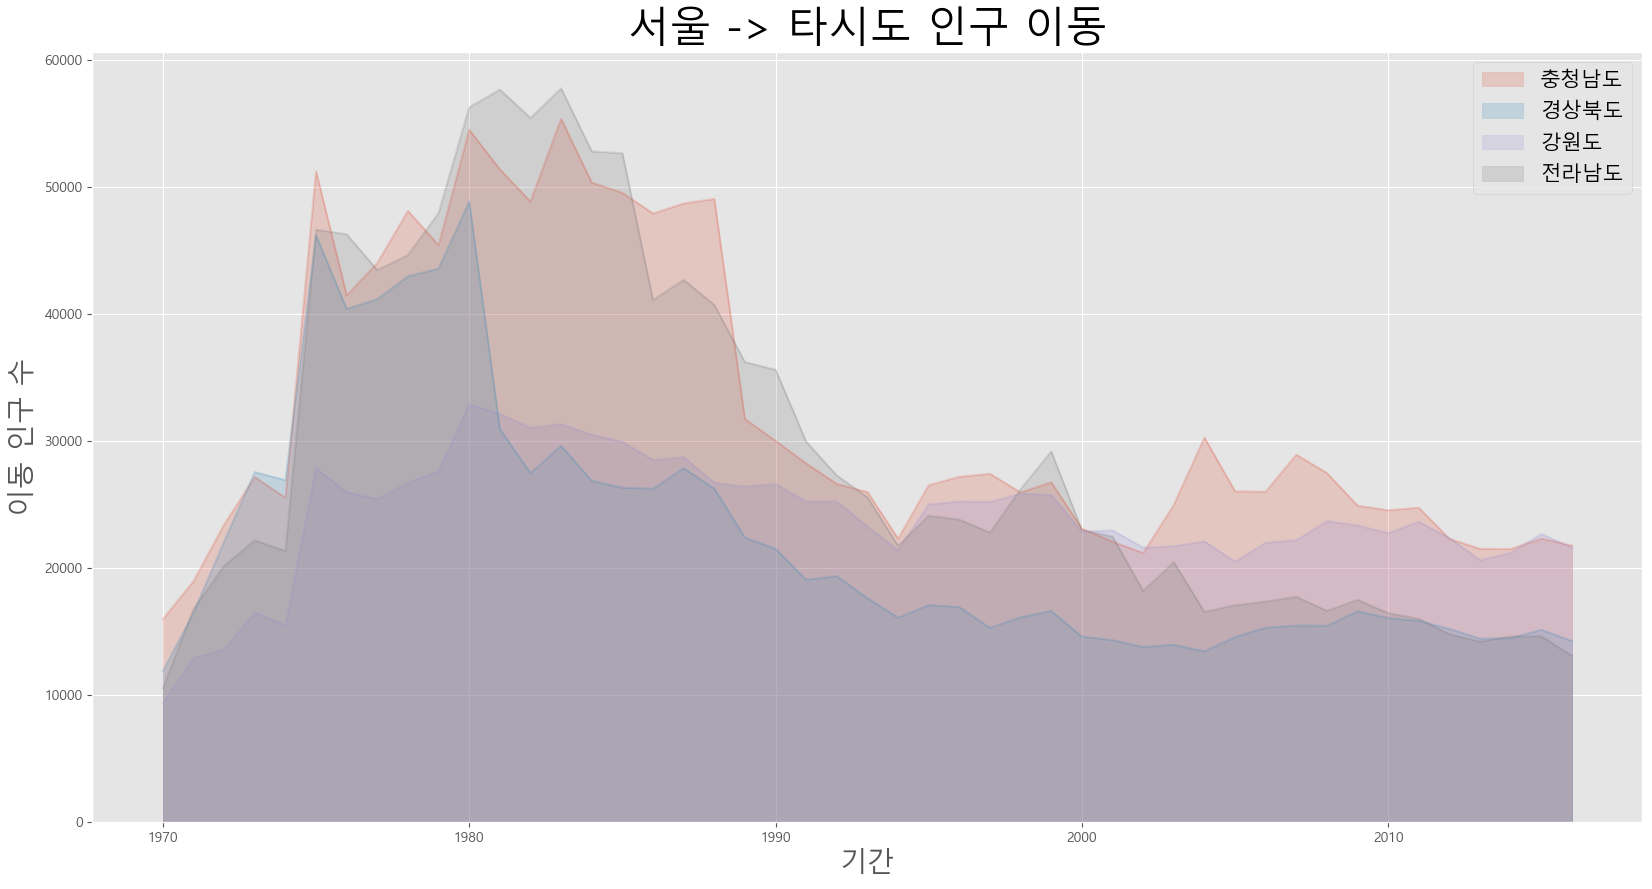

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
font_path="./data/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul

sr_one=df_seoul.loc['경기도']

col_years=list(map(str,range(1970,2017)))
df_4=df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4=df_4.astype(int)
df_4

df_4=df_4.transpose()
df_4.head(7)

plt.style.use('ggplot')

df_4.index=df_4.index.map(int)

df_4.plot(kind='area',stacked=False,alpha=0.2,figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best',fontsize=15)

plt.show()